<a href="https://colab.research.google.com/github/putrirahmawati1205/PCVK_Ganjil_2023/blob/main/Week_6_PCVk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the existing folder on your Drive as follows

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Import the following libraries that will be used during the following week 6 practicum
trial.

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Make an image histogram like the following histogram output based on the flowchart below :
(Use image lena.jpg)

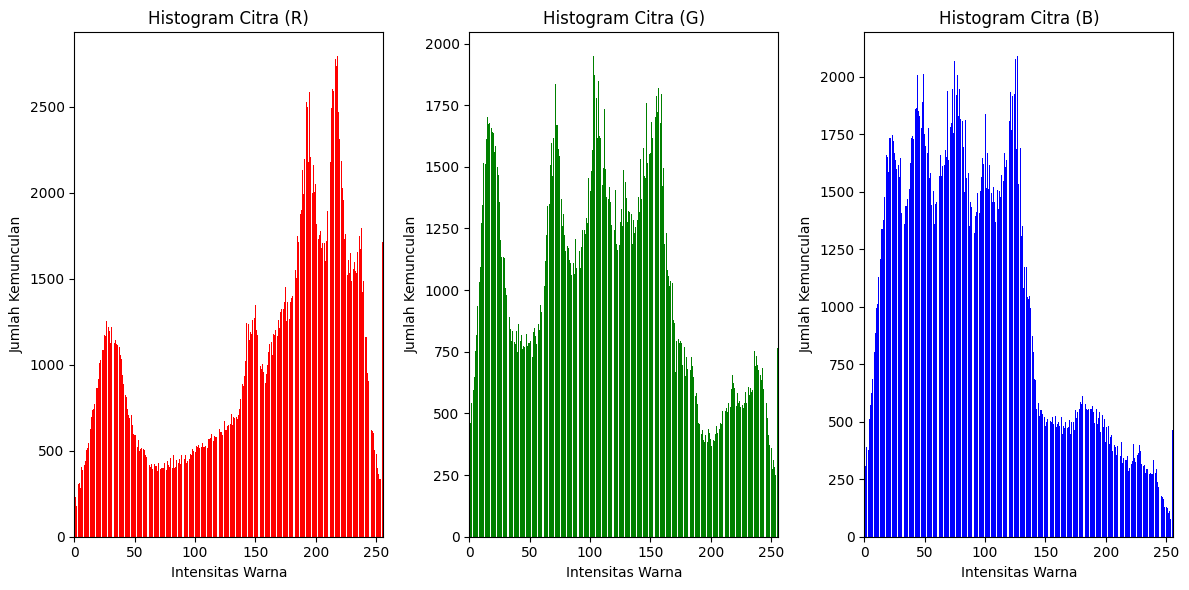

In [22]:
# Load the Lena image
image = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg')

# Split the image into its RGB channels
b, g, r = cv2.split(image)

# Calculate histograms for each channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Create a subplot for the RGB histograms
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.title("Histogram Citra (R)")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.bar(np.arange(256), hist_r[:, 0], color='red', label='Red (R)')
plt.xlim([0, 256])

plt.subplot(132)
plt.title("Histogram Citra (G)")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.bar(np.arange(256), hist_g[:, 0], color='green',label='Green (G)')
plt.xlim([0, 256])

plt.subplot(133)
plt.title("Histogram Citra (B)")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.bar(np.arange(256), hist_b[:, 0], color='blue',label='Blue (B)')
plt.xlim([0, 256])

# Display the histograms
plt.tight_layout()
plt.show()

4. After working on question no. 3, make the same image histogram but use the library
that is owned by NumPy, namely " histogram ". Compare the results. Does the
output appear the same?

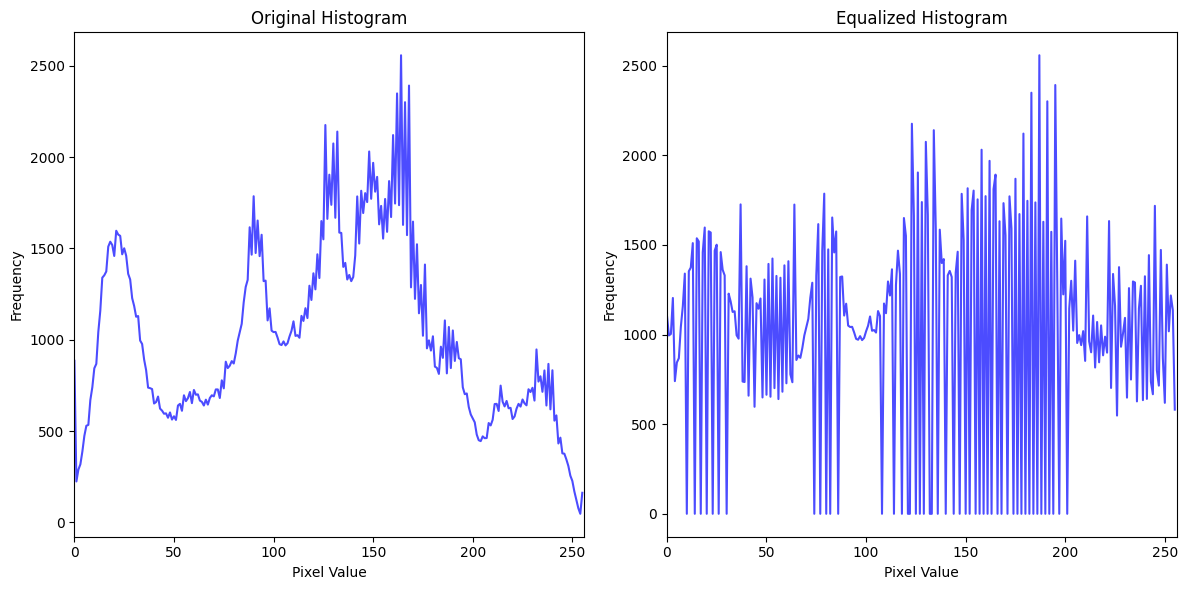

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the Lena image
image = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Apply histogram equalization using OpenCV
equalized_image = cv2.equalizeHist(image)

# Calculate the histograms for the original and equalized images using NumPy
hist_original = np.histogram(image, bins=256, range=(0, 256))[0]
hist_equalized = np.histogram(equalized_image, bins=256, range=(0, 256))[0]

# Plot the original and equalized histograms
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Original Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_original, color='blue', alpha=0.7)
plt.xlim([0, 256])

plt.subplot(122)
plt.title("Equalized Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized, color='blue', alpha=0.7)
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

5. Make an image histogram such as the output equalization histogram and also the
image display before and after the following equalization histogram process based on
the flowchart below : (Use image lena_lc .jpg)

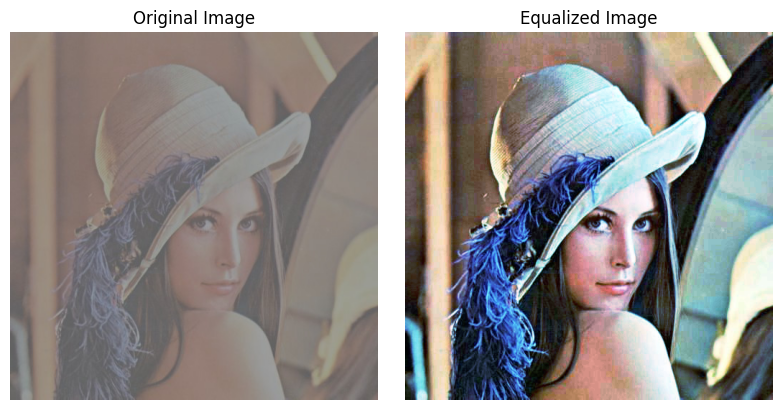

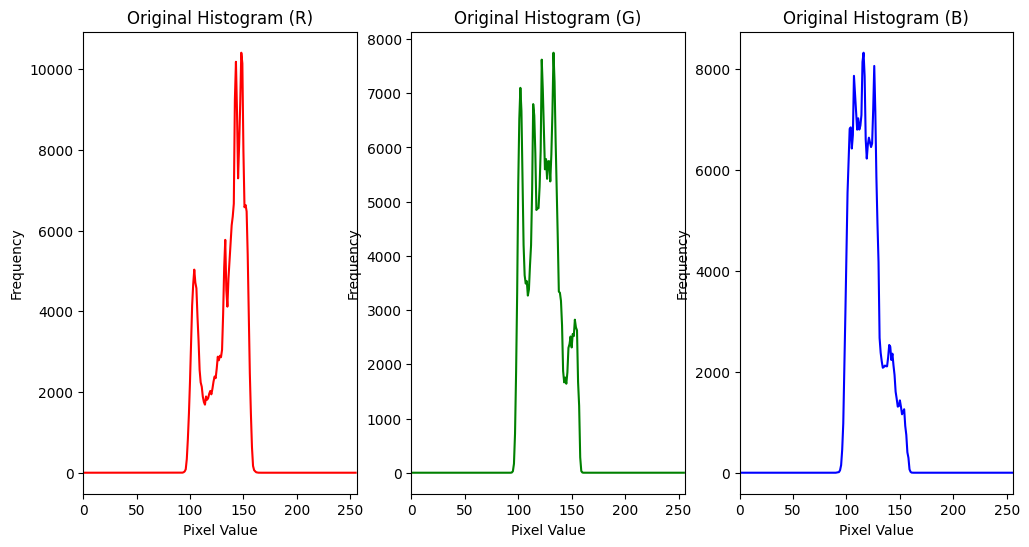

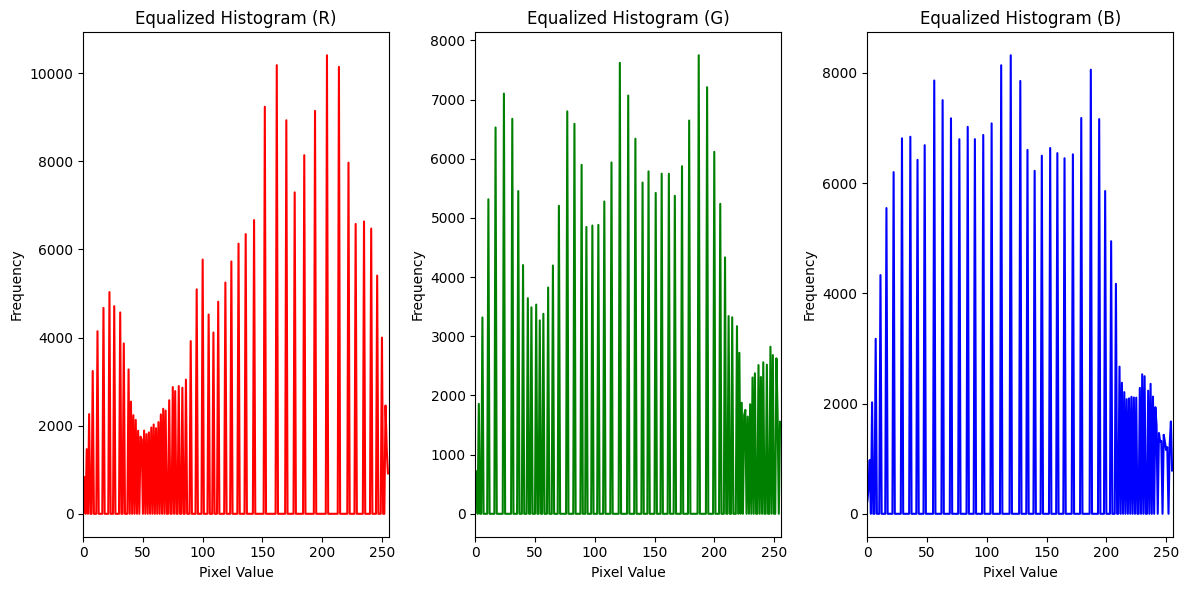

In [31]:
import cv2
import matplotlib.pyplot as plt

# Load the Lena image
image = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Split the image into its RGB channels
b, g, r = cv2.split(image)

# Perform histogram equalization for each channel
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

# Merge the equalized channels back into an RGB image
equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))

# Calculate the histograms for the original and equalized images for each channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

hist_equalized_b = cv2.calcHist([equalized_b], [0], None, [256], [0, 256])
hist_equalized_g = cv2.calcHist([equalized_g], [0], None, [256], [0, 256])
hist_equalized_r = cv2.calcHist([equalized_r], [0], None, [256], [0, 256])

# Plot the original and equalized images
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Equalized Image
plt.subplot(2, 3, 2)
plt.title("Equalized Image")
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display the plots
plt.tight_layout()
plt.show()

# Plot the original and equalized histograms for each channel
plt.figure(figsize=(12, 6))

# Original Histograms
plt.subplot(131)
plt.title("Original Histogram (R)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_r, color='red')
plt.xlim([0, 256])

plt.subplot(132)
plt.title("Original Histogram (G)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_g, color='green')
plt.xlim([0, 256])

plt.subplot(133)
plt.title("Original Histogram (B)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_b, color='blue')
plt.xlim([0, 256])

# Equalized Histograms
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.title("Equalized Histogram (R)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_r, color='red')
plt.xlim([0, 256])

plt.subplot(132)
plt.title("Equalized Histogram (G)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_g, color='green')
plt.xlim([0, 256])

plt.subplot(133)
plt.title("Equalized Histogram (B)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_b, color='blue')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

6. After working on question no. 5, make the same image histogram but use the library
owned by CV2, namely " equalizeHist ". Compare the results. Does the output
appear the same?

7. Do the mapping process of 16 million RGB colors into just 8 colors, namely black,
green, yellow, blue, cyan, magenta, white as shown in the following output based on
the flowchart below! (Use the image testlena .jpg)

8. Do the Floyd and Steinberg dithering process like the following output (initial image
display, and after dithering display) based on the flowchart below! (Use wiki.jpg
image)